In [3]:
using Pkg
# Pkg.add("Distances")
# Pkg.add("Random")
using Distances
using Random

# function two_opt(tour, d)
#     println(tour)
#     len = length(tour)
#     improved = true
#     while improved
#         improved = false
#         for i in 1:(len-2)
#             for j in (i+1):(len-1)
#                 if j - i == 1
#                     continue
#                 end
#                 if d[tour[i], tour[j]] > d[tour[i+1], tour[j+1]]
#                     n = tour[i+1]
#                     tour[i + 1] = tour[j]
#                     tour[j] = n
# #                     best[i:j] = best[j - 1:i - 1:-1]
#                     improved = true
# #                     end
#                 end
#             end
#         end
# #         route = best
#     end
#     return tour
# end

function aco_solution(n, d, ants, alpha, beta, ip, iterations, Q)
    #################################################################
    #####       This part is to initialize some fields         ######
    #################################################################
#     selected tour and ants' tour all start from the first city
    stour = zeros(Int64, n)
    atour = zeros(Int64, ants*n)
    stour[1] = 1
    atour = reshape(atour, ants, n)
    tour_cost = zeros(Float64, ants)
#     println(atour[1,:])
    min_d = typemax(Float64)
    
#     pheromone map. N cities has n*(n-1)/2, but we still use n x n to be consistant with d matrix
    pmap = fill(Float64(ip), n*n)
    pmap = reshape(pmap, n, n)
#     probablities to the other cities
    probabilities = zeros(Float64, n)

    #################################################################
    #####         This part is to start the iterations         ######
    #################################################################
#     for certain iterations
    for i in 1:(iterations)
        ####################
        ## Edge Selection ##
        ####################
#         Edge selection: each ant starts from the first city finishs its tour
        for ant in 1:ants
#             start from the first city
            current_city = 1
            visited = [1]
            length = 0 # length of the tour
#             finish the tour, we need to run n - 1 times because we have n - 1 cities
            for j in 1:(n - 1)
#                 calculate the probabilities: sum is the denominator
                sum = 0
#                 calculate the numerators
                for k in 1:n
                    if !in(k, visited)
#                         print(d[current_city, k], ", [", current_city, ", ", k, "]")
                        probabilities[k] = (pmap[current_city, k] ^ alpha) * ((1/d[current_city, k]) ^ beta)
                        sum = sum + probabilities[k]
                    end
                end
#                 println(probabilities)
#                 real probabilities
                next_city = -1 # in case the sum of the probability is 0.99999
                r = rand()
                sum1 = 0
                for k in 1:n
                    probabilities[k] = probabilities[k] / sum
                    sum1 = sum1 + probabilities[k]
                    if r <= sum1
                        next_city = k
                        break
                    end
                end
                visited = hcat(visited, next_city)
                length = length + d[current_city, next_city]
                probabilities[next_city] = 0
#                 println("distance = ", d[current_city, next_city])
                current_city = next_city
#             select based on the probabilities and the random number
            end
            if length < min_d
                min_d = length
                stour = visited
                println(length)
                println("selected = ", stour)
                println()
            end
            atour[ant, :] = visited
            tour_cost[ant] = length
#             println("visited = ", visited)
#             println(atour)
        end
        

        ######################
        ## Pheromone Update ##
        ######################
#         Note: the pheromone is not updated until all ants finish. This avoid the impact between ants in one iteration
#         println("cost = ", tour_cost)
#         println(atour)
        
        for ant in 1:ants
            for c in 1:(n-1)
                pmap[atour[ant, c], atour[c+1]] = pmap[atour[ant, c], atour[c+1]] + Q/tour_cost[ant]
                pmap[atour[ant, c+1], atour[c]] = pmap[atour[ant, c], atour[c+1]]
            end
        end
#         println("pmap = ", pmap)
    end
    return stour
end

# main program

# some modifiable
ant_count = 20
n=50 # cities
alpha = 0.3 # alpha >= 0
beta = 4 # beta >= 1
iterations = 600
initial_pheromone = 0.5
pheromone_strength = 0.75

x = rand(2,n) # 2d-world
# compute Euclidean distance between cities 
d = pairwise(Euclidean(), x, x, dims=2)

aco=aco_solution(n,d, ant_count, alpha, beta, initial_pheromone, iterations, pheromone_strength)
# t_aco = two_opt(aco, d)  

7.421803460457513
selected = [1 47 41 38 31 3 50 27 12 19 21 18 43 45 4 25 23 42 49 30 37 34 48 29 2 40 46 26 22 36 17 6 39 14 35 13 10 15 11 7 9 16 5 8 24 28 32 20 33 44]

7.0642634838611915
selected = [1 47 41 38 11 15 49 23 42 34 48 29 20 32 28 4 25 45 3 50 27 21 18 43 10 7 31 12 19 9 16 33 44 5 24 8 30 37 39 6 17 22 26 2 46 40 36 35 13 14]

6.491620895762795
selected = [1 47 41 38 11 15 7 31 50 3 27 19 12 16 33 44 8 24 5 28 32 45 4 25 37 30 49 23 42 48 17 6 39 14 35 13 36 22 26 2 40 46 20 29 34 43 18 21 9 10]

6.417186211902548
selected = [1 47 41 11 38 15 10 7 31 50 27 3 19 12 9 16 33 44 8 24 5 28 32 20 40 46 2 29 34 48 42 23 49 37 25 4 45 30 18 43 21 14 39 6 17 36 22 26 35 13]

6.402920105351377
selected = [1 47 41 38 11 15 7 31 27 19 12 9 21 18 43 10 30 37 45 4 25 48 29 26 22 36 17 6 39 14 35 13 34 42 23 49 2 46 40 20 32 28 5 8 24 16 33 44 50 3]

6.320408588162137
selected = [1 47 41 38 11 21 43 18 12 19 27 3 50 31 10 7 15 37 30 49 42 23 34 48 29 25 4 45 9 16 33 44 8 24 5 32 28 

1×50 Array{Int64,2}:
 1  47  41  38  11  7  31  27  50  3  …  36  17  6  39  14  13  35  15  10

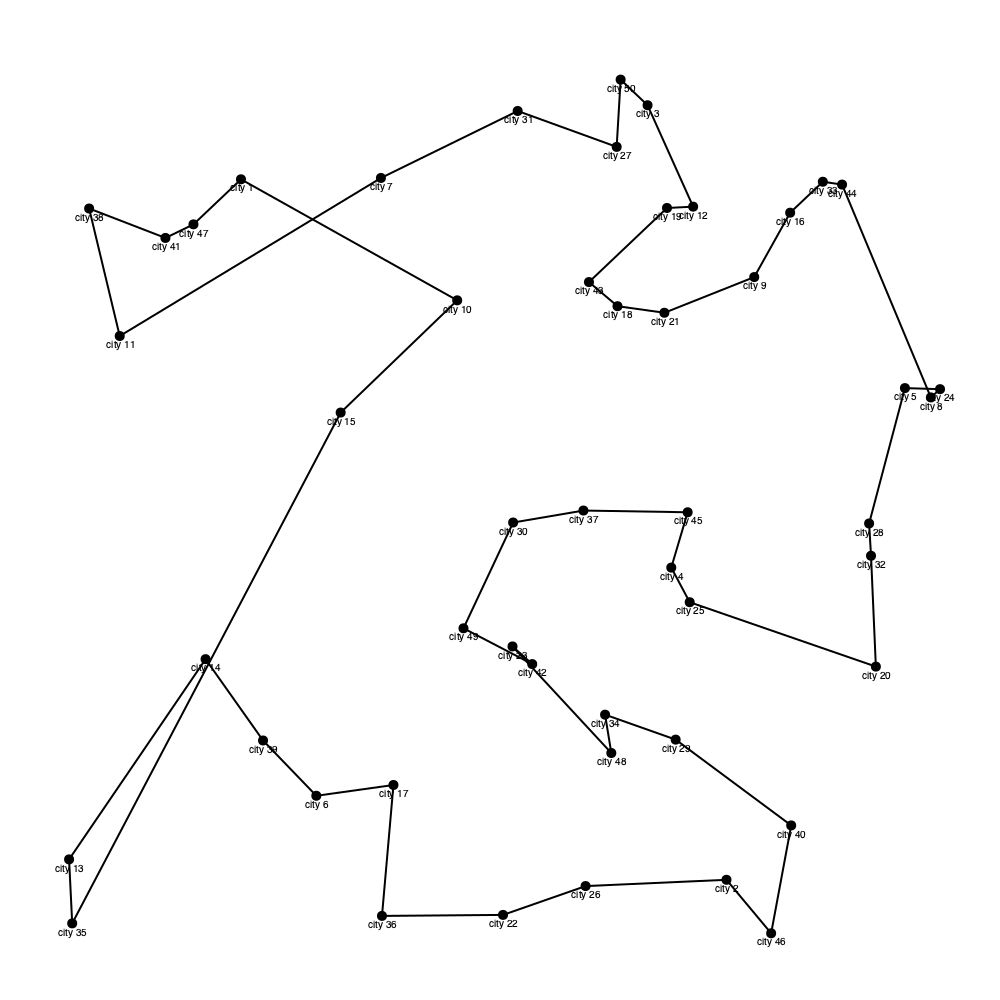

In [4]:
# Pkg.build("Cairo")
# Pkg.add("Luxor")
using Luxor
# draw tsp tour
function draw_tsp(x,o,n,size=1000,radius=5)
    Drawing(size, size, "TSP.png")
    stretch=Int64(0.9size)
    origin(Int64(0.05size),Int64(0.05size))
    # draw cities
    for i in 1:n
        A=Point(stretch*x[1,i],stretch*x[2,i])
        circle(A, radius, :fill)
        label("city $i", :S, A)
    end
    # connect cities by edges
    for i in 1:n-1
        A=Point(stretch*x[1,o[i]],stretch*x[2,o[i]])
        B=Point(stretch*x[1,o[i+1]],stretch*x[2,o[i+1]])
        line(A, B, :stroke)
    end
    # return to first city
    A=Point(stretch*x[1,o[n]],stretch*x[2,o[n]])
    B=Point(stretch*x[1,o[1]],stretch*x[2,o[1]])
    line(A, B, :stroke)
    finish()
    preview()
end
draw_tsp(x,aco,n)